<a href="https://colab.research.google.com/github/paularedondosastre/APRENDIZAJE_AUTOMATICO_23_24/blob/main/prueba_practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba - Práctica 1



In [76]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.13.0


In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# Cargar datos
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocesamiento de datos
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [78]:
# Definir y entrenar los 8 modelos
neuronas_capa_1 = [10, 10, 10, 10, 512, 512, 512, 512]
funciones_activacion = ['relu', 'relu', 'sigmoid', 'sigmoid', 'relu', 'relu', 'sigmoid', 'sigmoid']
optimizadores = ['sgd', 'rmsprop', 'sgd', 'rmsprop', 'sgd', 'rmsprop', 'sgd', 'rmsprop']

models = []

for i in range(8):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(neuronas_capa_1[i], activation=funciones_activacion[i]),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizadores[i], loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

    models.append(model)


Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 1.4369 - accuracy: 0.5021 - val_loss: 0.9362 - val_accuracy: 0.6994
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.8011 - accuracy: 0.7369 - val_loss: 0.7063 - val_accuracy: 0.7686
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.6613 - accuracy: 0.7802 - val_loss: 0.6269 - val_accuracy: 0.7837
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.5979 - accuracy: 0.7989 - val_loss: 0.5870 - val_accuracy: 0.8000
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.5617 - accuracy: 0.8092 - val_loss: 0.5539 - val_accuracy: 0.8105
Epoch 1/5
750/750 [==============================] - 4s 5ms/step - loss: 0.7321 - accuracy: 0.7548 - val_loss: 0.5276 - val_accuracy: 0.8155
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.4913 - accuracy: 0.8292 - val_loss: 0.4893 - val_accuracy: 0.8283
Epoch 3/5
750

#Analizar y reflexionar sobre los resultados

In [79]:
for idx, model in enumerate(models):
    print(f"Resumen del Modelo {idx + 1}:")
    model.summary()


Resumen del Modelo 1:
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 10)                7850      
                                                                 
 dense_47 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Resumen del Modelo 2:
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                  

#3. Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25)

In [80]:
# Definir y entrenar el modelo del Caso 2 con 25 épocas
model_case2_updated = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])

model_case2_updated.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_case2_updated.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2)


# Definir y entrenar el modelo del Caso 7 con 25 épocas
model_case7_updated = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model_case7_updated.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_case7_updated.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2)

# Evaluar los modelos en el conjunto de prueba
loss_case2_original, acc_case2_original = models[1].evaluate(test_images, test_labels, verbose=2)
loss_case2_updated, acc_case2_updated = model_case2_updated.evaluate(test_images, test_labels, verbose=2)
loss_case7_original, acc_case7_original = models[6].evaluate(test_images, test_labels, verbose=2)
loss_case7_updated, acc_case7_updated = model_case7_updated.evaluate(test_images, test_labels, verbose=2)

# Imprimir resultados
print("Caso 2 Original - Precisión en datos de prueba: {:.2f}%".format(acc_case2_original * 100))
print("Caso 2 Actualizado (25 épocas) - Precisión en datos de prueba: {:.2f}%".format(acc_case2_updated * 100))
print("Caso 7 Original - Precisión en datos de prueba: {:.2f}%".format(acc_case7_original * 100))
print("Caso 7 Actualizado (25 épocas) - Precisión en datos de prueba: {:.2f}%".format(acc_case7_updated * 100))


Epoch 1/25
750/750 [==============================] - 4s 4ms/step - loss: 0.7893 - accuracy: 0.7402 - val_loss: 0.5478 - val_accuracy: 0.8130
Epoch 2/25
750/750 [==============================] - 3s 4ms/step - loss: 0.5148 - accuracy: 0.8234 - val_loss: 0.5315 - val_accuracy: 0.8160
Epoch 3/25
750/750 [==============================] - 3s 4ms/step - loss: 0.4751 - accuracy: 0.8360 - val_loss: 0.4840 - val_accuracy: 0.8342
Epoch 4/25
750/750 [==============================] - 3s 4ms/step - loss: 0.4546 - accuracy: 0.8425 - val_loss: 0.4477 - val_accuracy: 0.8469
Epoch 5/25
750/750 [==============================] - 3s 4ms/step - loss: 0.4418 - accuracy: 0.8464 - val_loss: 0.4481 - val_accuracy: 0.8478
Epoch 6/25
750/750 [==============================] - 3s 4ms/step - loss: 0.4327 - accuracy: 0.8508 - val_loss: 0.4482 - val_accuracy: 0.8468
Epoch 7/25
750/750 [==============================] - 3s 5ms/step - loss: 0.4256 - accuracy: 0.8530 - val_loss: 0.4389 - val_accuracy: 0.8499
Epoch 

#4. Evaluar el rendimiento en el conjunto de datos de prueba

In [81]:
for idx, model in enumerate(models):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Modelo {idx + 1} - Precisión en datos de prueba: {test_acc * 100:.2f}%")


313/313 - 1s - loss: 0.5753 - accuracy: 0.7997 - 715ms/epoch - 2ms/step
Modelo 1 - Precisión en datos de prueba: 79.97%
313/313 - 1s - loss: 0.4816 - accuracy: 0.8304 - 734ms/epoch - 2ms/step
Modelo 2 - Precisión en datos de prueba: 83.04%
313/313 - 1s - loss: 1.0681 - accuracy: 0.6572 - 694ms/epoch - 2ms/step
Modelo 3 - Precisión en datos de prueba: 65.72%
313/313 - 1s - loss: 0.4920 - accuracy: 0.8267 - 696ms/epoch - 2ms/step
Modelo 4 - Precisión en datos de prueba: 82.67%
313/313 - 1s - loss: 0.4931 - accuracy: 0.8311 - 983ms/epoch - 3ms/step
Modelo 5 - Precisión en datos de prueba: 83.11%
313/313 - 1s - loss: 0.3522 - accuracy: 0.8770 - 977ms/epoch - 3ms/step
Modelo 6 - Precisión en datos de prueba: 87.70%
313/313 - 1s - loss: 0.6666 - accuracy: 0.7692 - 708ms/epoch - 2ms/step
Modelo 7 - Precisión en datos de prueba: 76.92%
313/313 - 1s - loss: 0.4106 - accuracy: 0.8511 - 693ms/epoch - 2ms/step
Modelo 8 - Precisión en datos de prueba: 85.11%


#5. Hacer predicciones para la 6ª imagen de prueba usando cada modelo

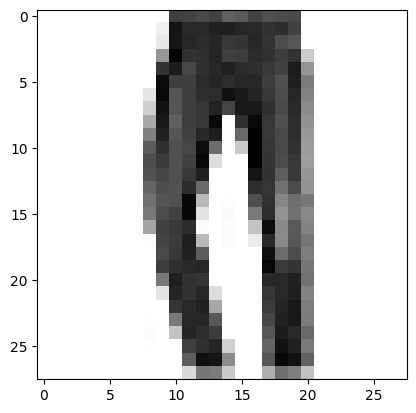

In [82]:
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [83]:
import numpy as np
for idx, model in enumerate(models):
    prediction = model.predict(test_images[5].reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)
    print(f"Modelo {idx + 1} - Predicción para la 6ª imagen de prueba: {predicted_label}")


1/1 [==============================] - 0s 52ms/step
Modelo 1 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 55ms/step
Modelo 2 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 61ms/step
Modelo 3 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 52ms/step
Modelo 4 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 52ms/step
Modelo 5 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 51ms/step
Modelo 6 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 55ms/step
Modelo 7 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 60ms/step
Modelo 8 - Predicción para la 6ª imagen de prueba: 1



#6. Graficar cómo de bien o de mal se comporta el modelo para cada uno de los 8 casos

In [84]:
import matplotlib.pyplot as plt
def plot_image(i, predictions_array, true_label, img):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.yticks([])
  plt.xticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vemos la predicción de la 6ª figura de las imágenes de test

ESTO NO ESTÁ FUNCIONANDO CORRECTLY

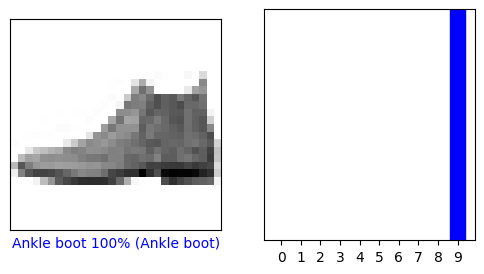

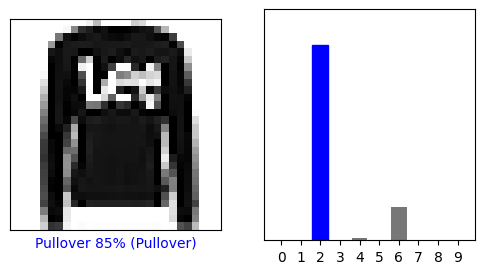

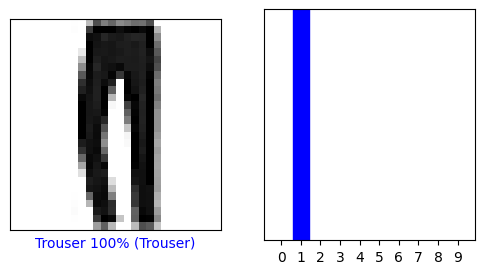

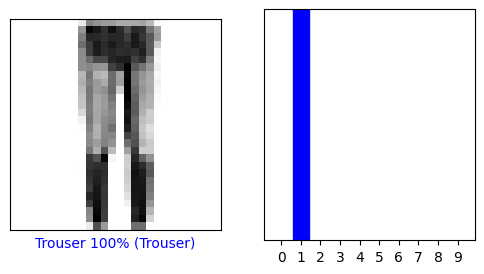

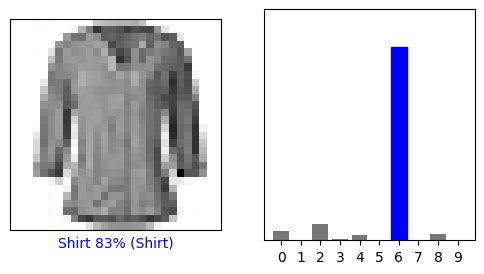

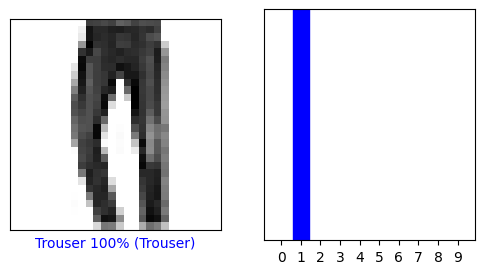

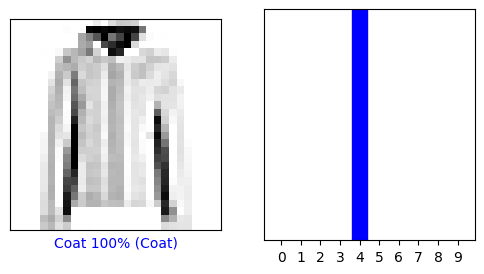

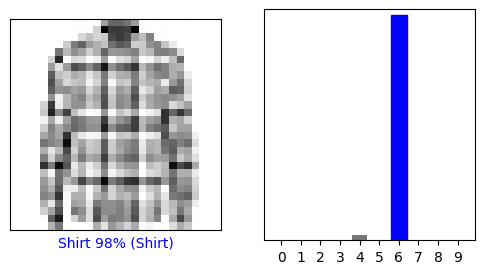

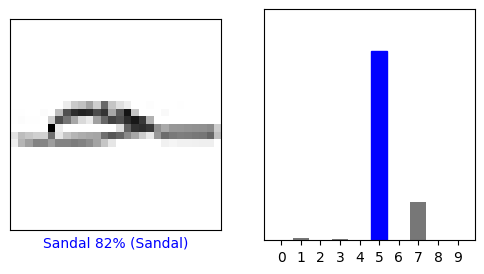

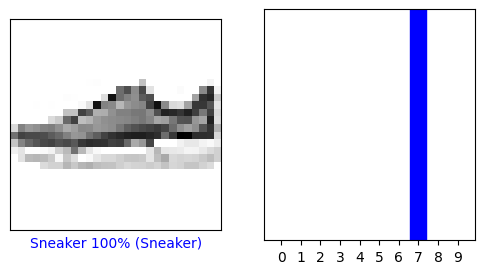

<Figure size 640x480 with 0 Axes>

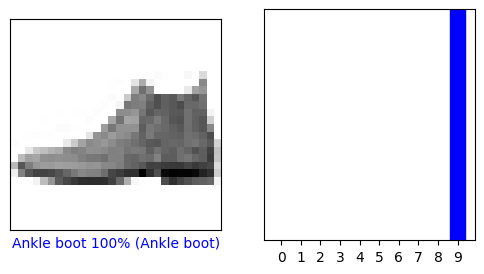

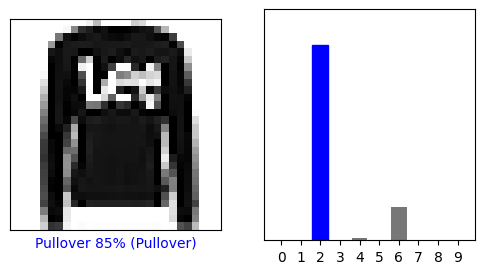

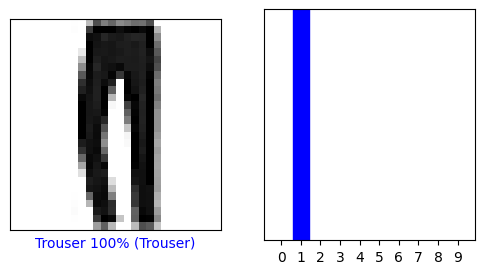

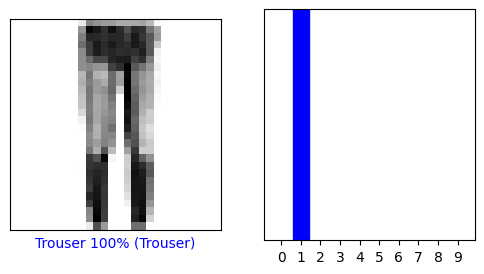

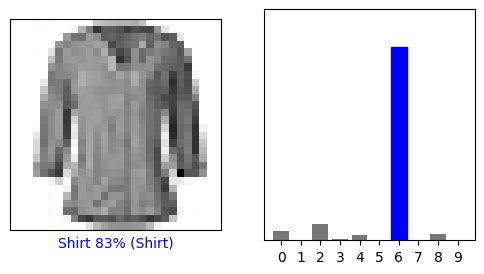

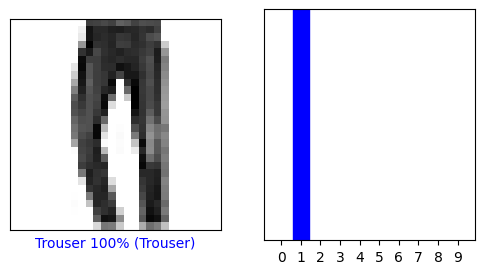

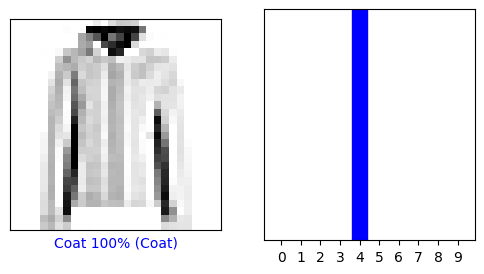

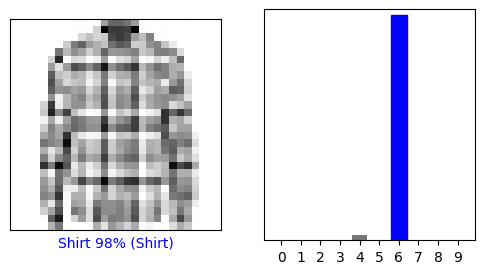

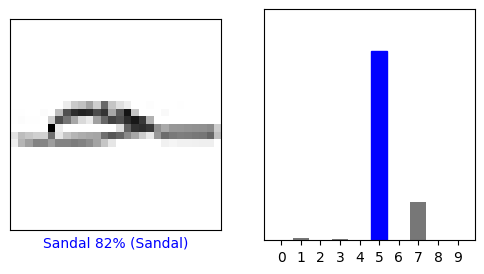

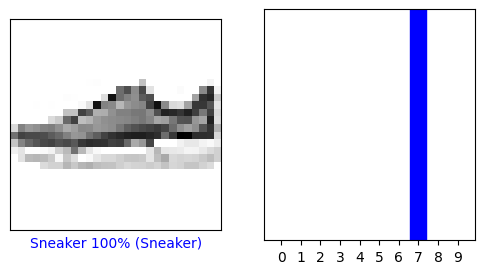

<Figure size 640x480 with 0 Axes>

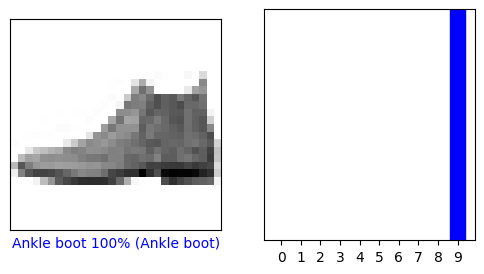

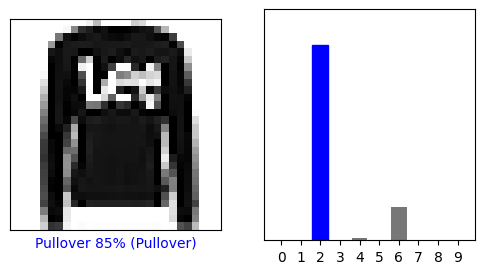

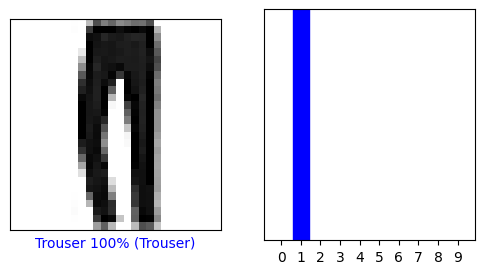

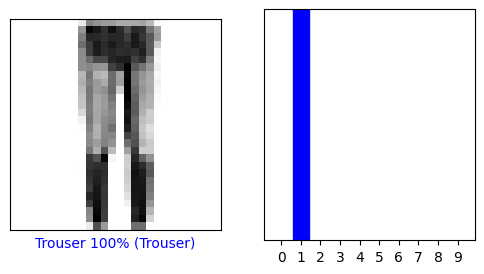

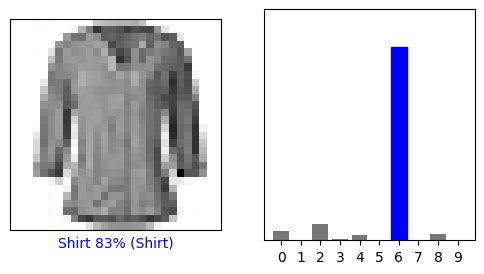

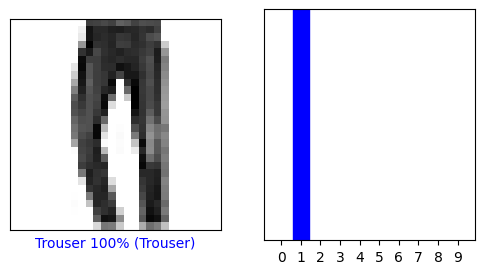

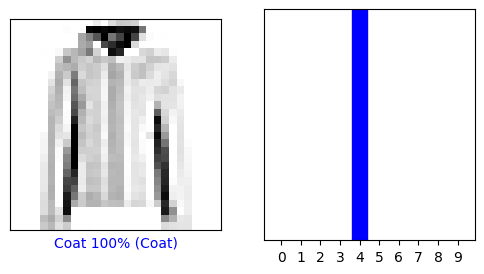

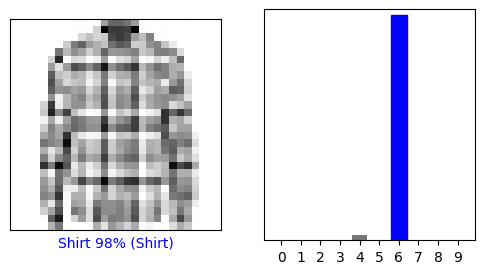

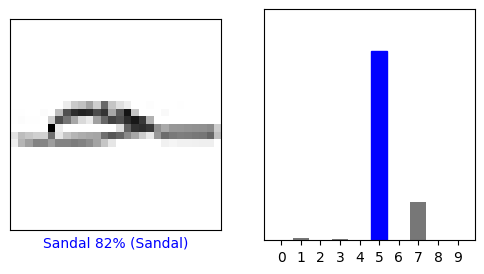

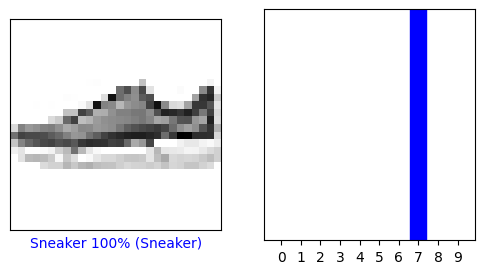

<Figure size 640x480 with 0 Axes>

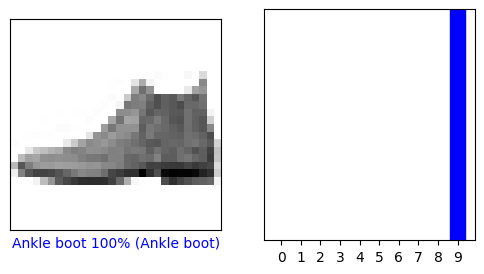

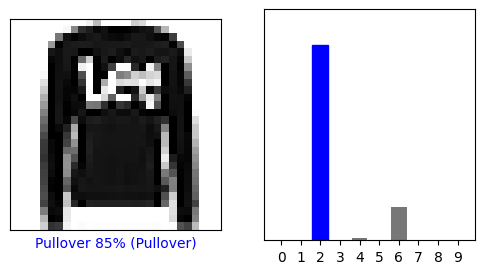

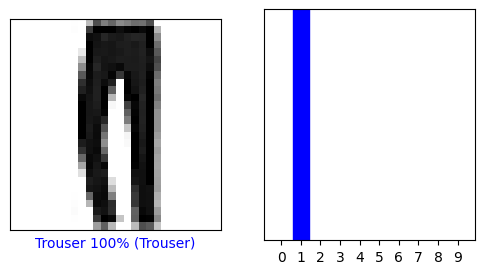

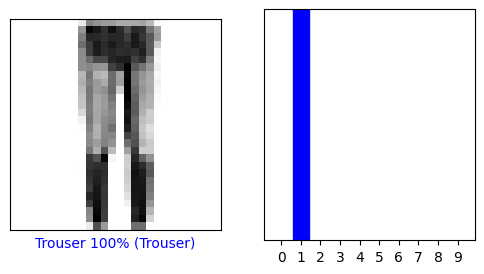

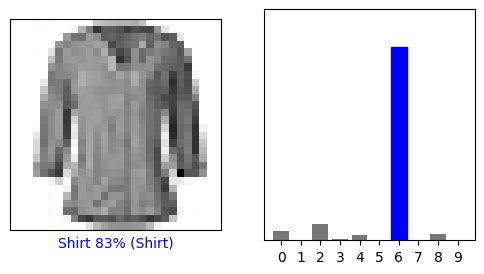

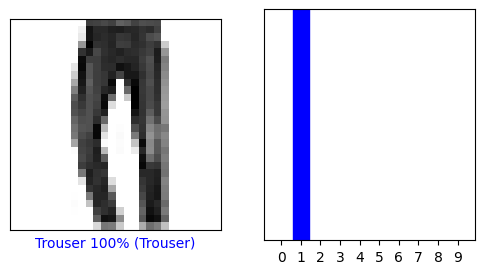

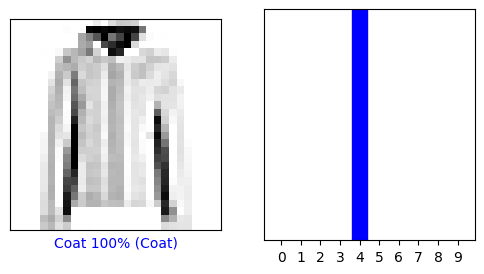

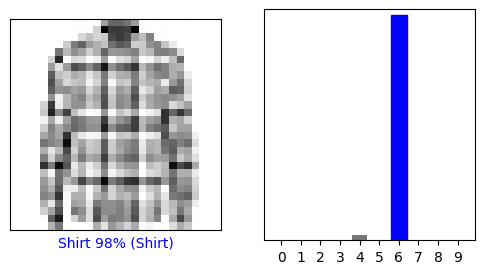

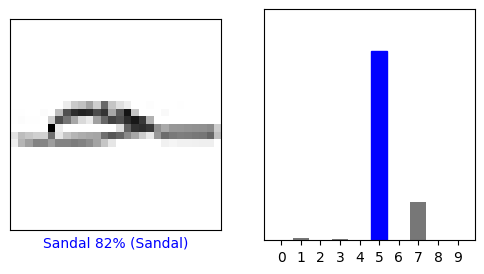

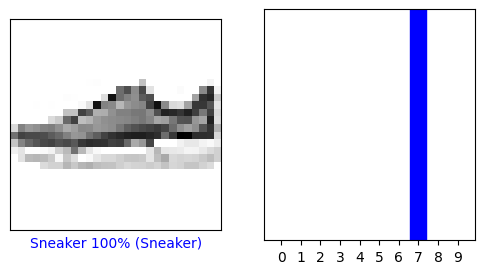

<Figure size 640x480 with 0 Axes>

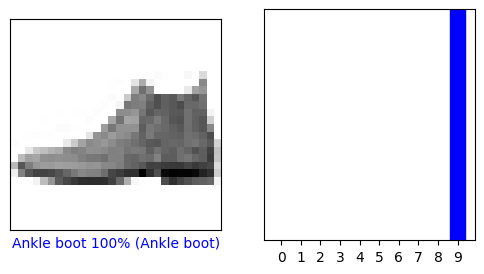

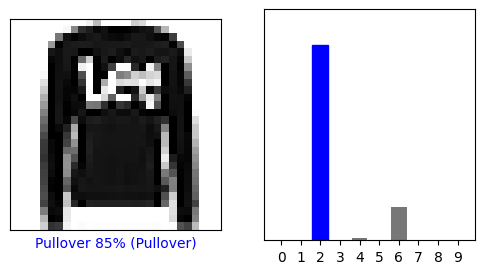

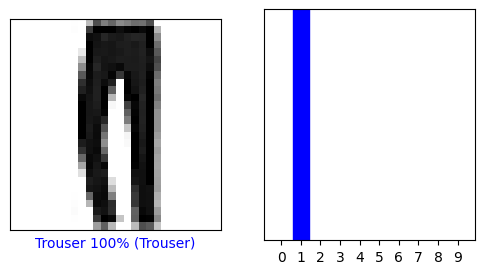

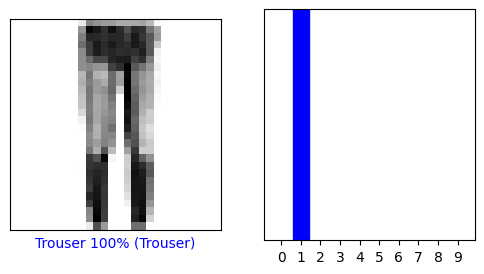

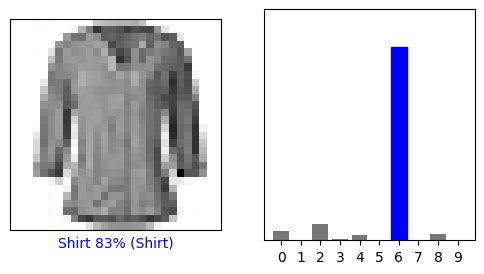

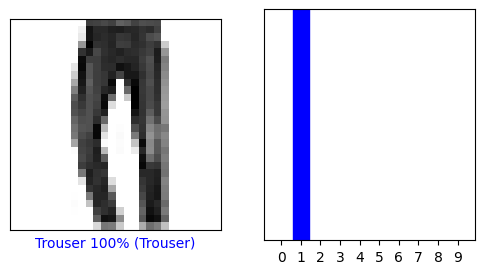

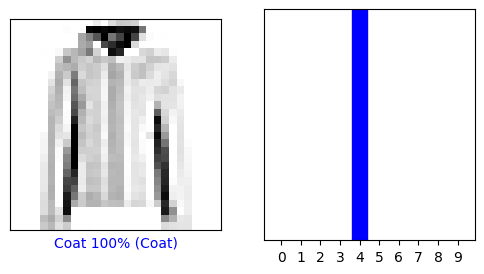

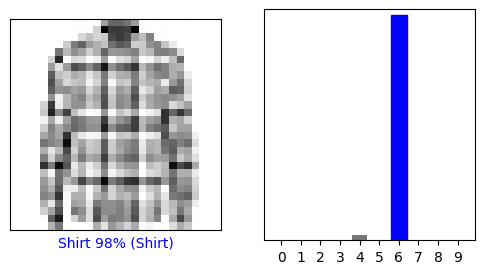

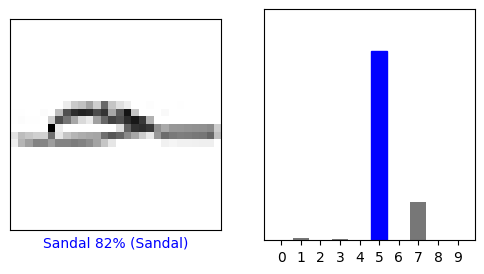

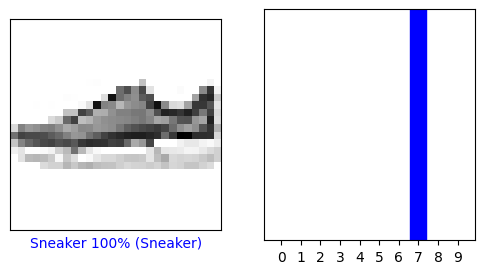

<Figure size 640x480 with 0 Axes>

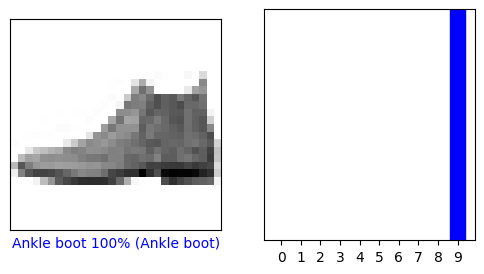

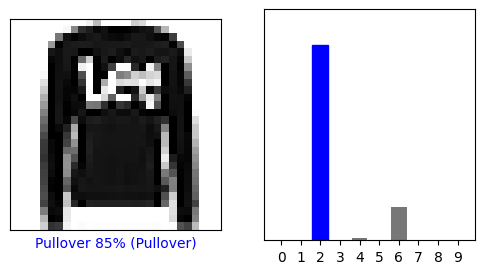

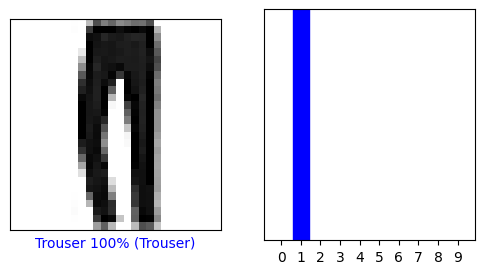

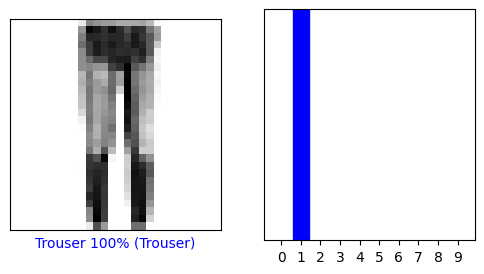

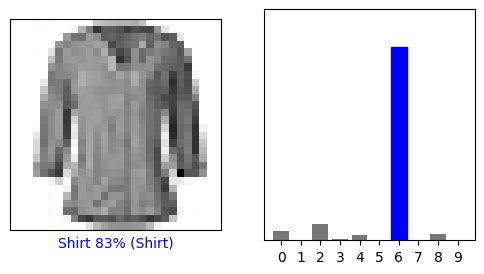

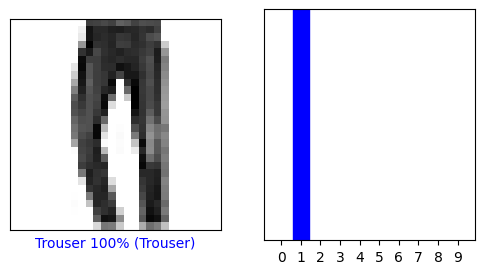

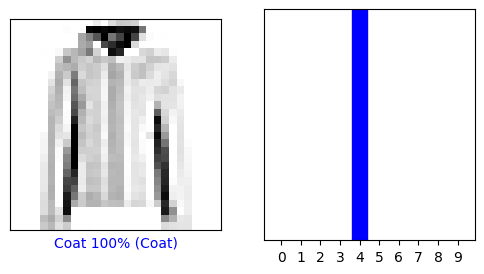

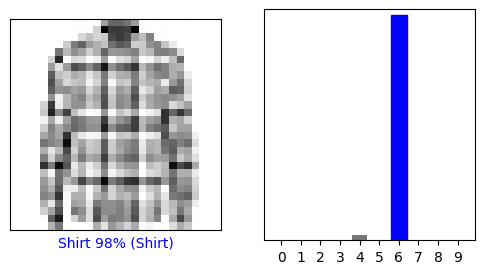

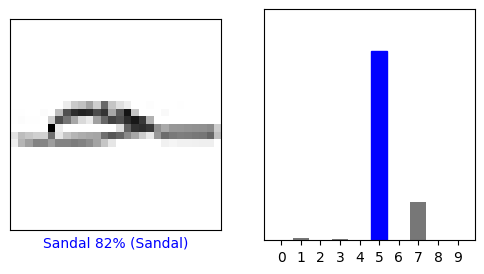

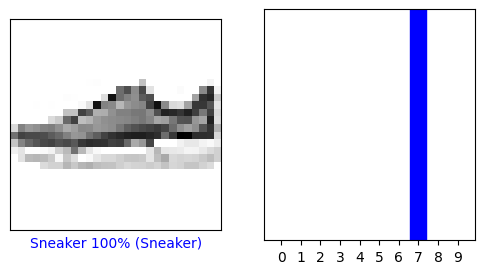

<Figure size 640x480 with 0 Axes>

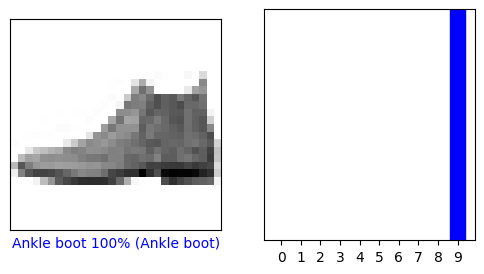

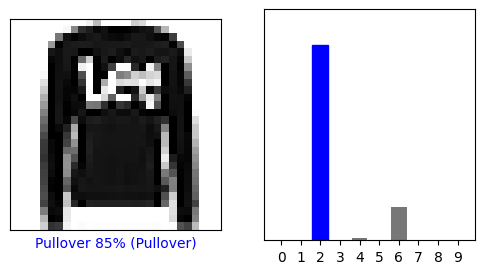

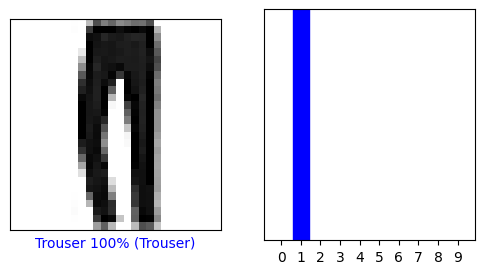

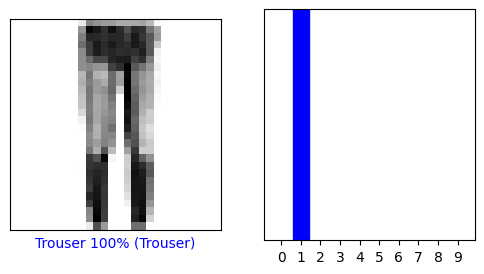

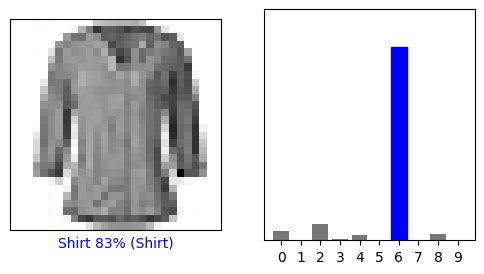

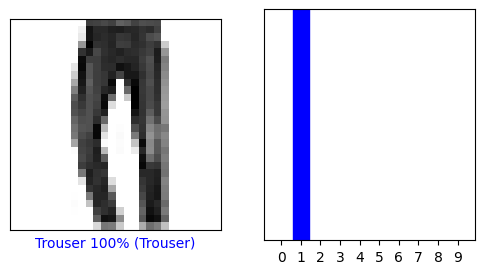

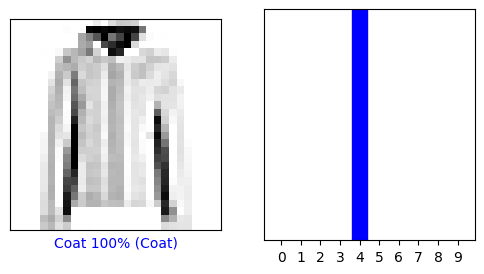

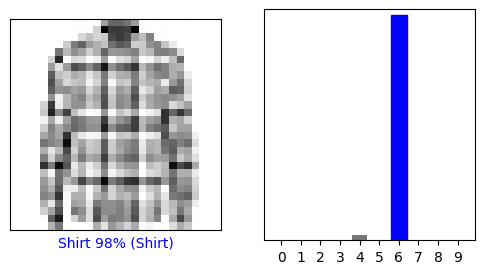

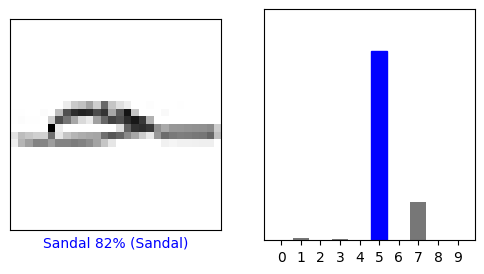

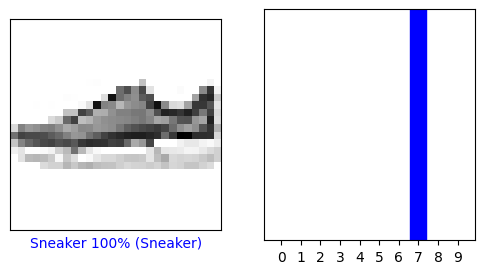

<Figure size 640x480 with 0 Axes>

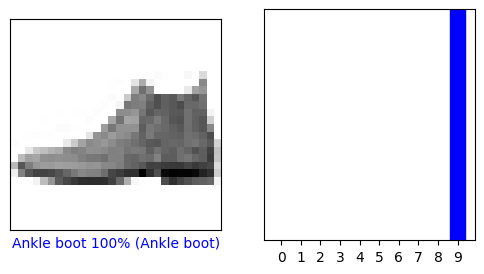

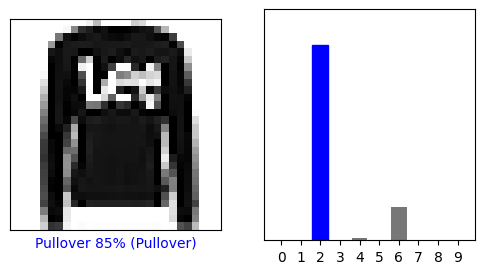

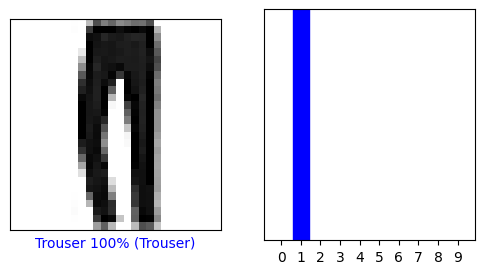

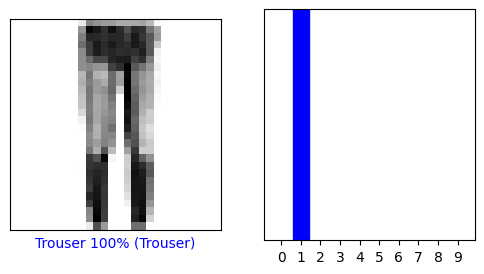

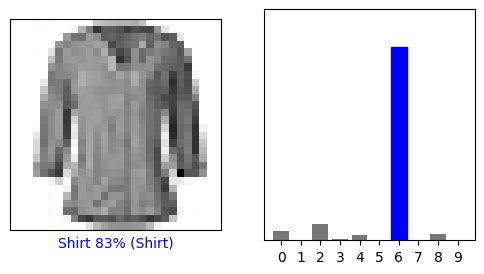

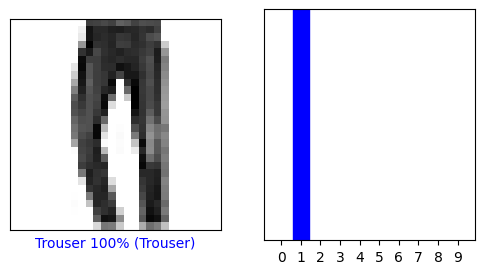

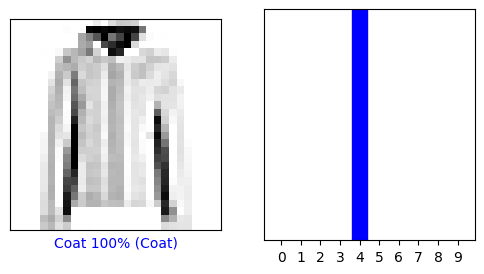

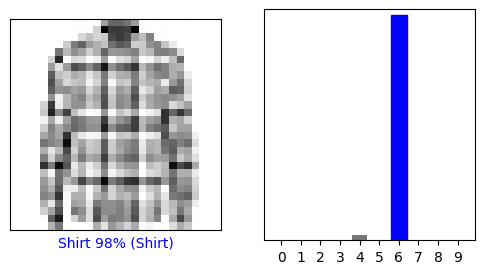

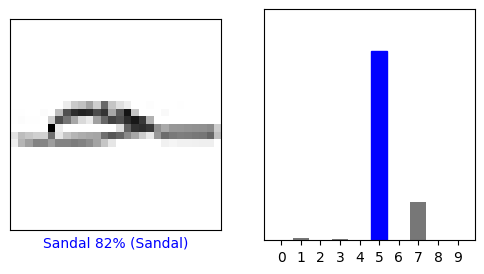

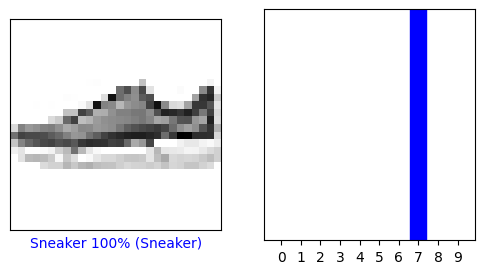

<Figure size 640x480 with 0 Axes>

In [95]:
#(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
#predictions = model.predict(test_images)


# Loop para cada modelo y visualización de las predicciones para las 10 primeras imágenes del conjunto de prueba
for idx, model in enumerate(models):
    #predictions = model.predict(test_images)
    for i in range(10):
        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plot_image(i, predictions[i], test_labels, test_images)
        plt.subplot(1, 2, 2)
        plot_value_array(i, predictions[i], test_labels)
        plt.show()

    plt.tight_layout()
    plt.show()



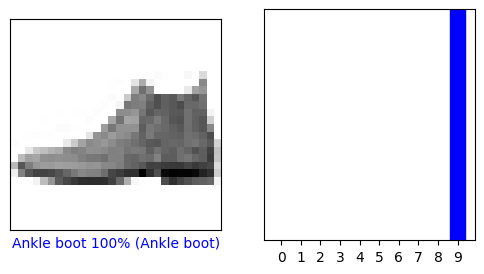

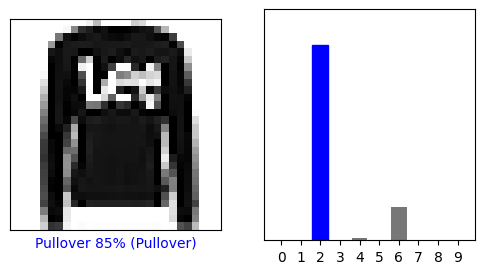

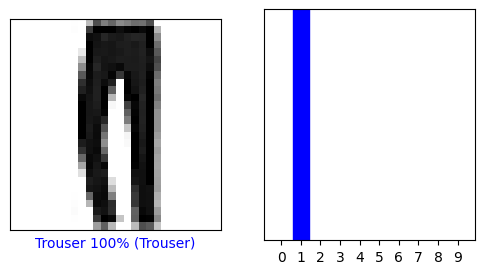

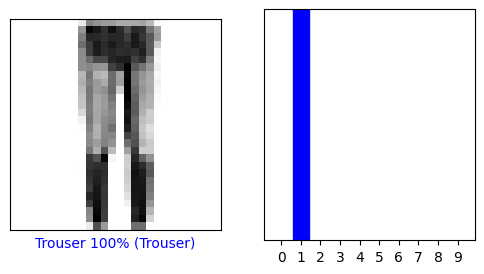

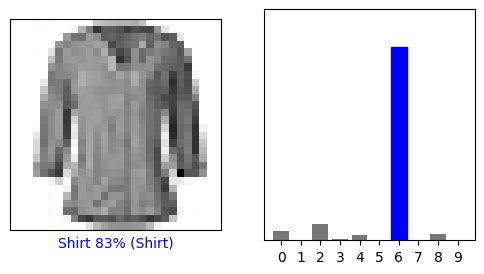

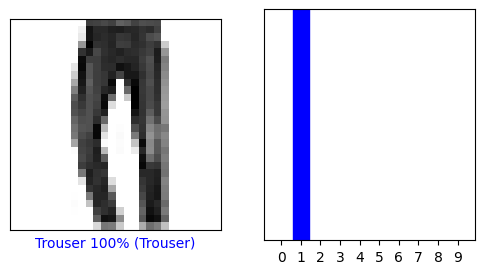

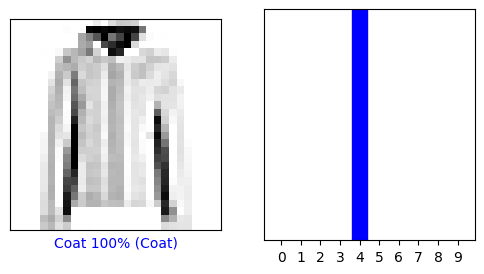

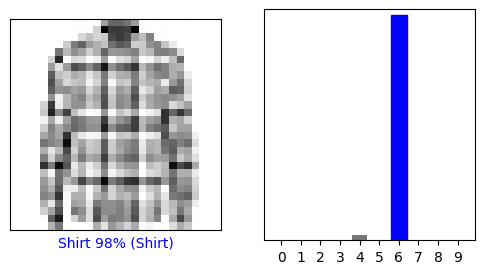

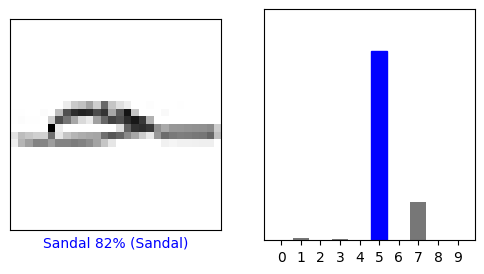

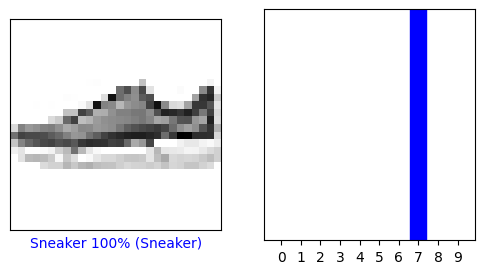

In [93]:
for i in range(10):
  plt.figure(figsize=(6, 3))
  plt.subplot(1, 2, 1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1, 2, 2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

#7. Mejore el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por ‘adam’ y la función de pérdida ‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho optimizador y función de pérdida, explícalos con tus propias palabras y plantea tus reflexiones respecto al resultado.

Al usar el nuevo modelo con adam vemos que mejora, pasando de una precisión del 60 y pico% a casi un 84%

In [101]:
from keras.optimizers import Adam


# Construir el nuevo modelo mejorado
model_3_update = Sequential([
    Flatten(input_shape=(28, 28)),  # Capa de entrada para aplanar las imágenes
    Dense(10, activation='sigmoid')  # Capa densa con 10 neuronas y activación sigmoid (porque usamos sparse_categorical_crossentropy)
])

# Compilar el modelo con optimizador Adam y función de pérdida sparse_categorical_crossentropy
model_3_update.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_3_update.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model_3_update.evaluate(test_images, test_labels, verbose=2)
print("Precisión en el conjunto de prueba:", test_accuracy)


Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.6841 - accuracy: 0.7718 - val_loss: 0.5234 - val_accuracy: 0.8259
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.4980 - accuracy: 0.8313 - val_loss: 0.4816 - val_accuracy: 0.8354
Epoch 3/5
750/750 [==============================] - 5s 7ms/step - loss: 0.4606 - accuracy: 0.8429 - val_loss: 0.4757 - val_accuracy: 0.8304
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.4412 - accuracy: 0.8485 - val_loss: 0.4451 - val_accuracy: 0.8461
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.4288 - accuracy: 0.8540 - val_loss: 0.4332 - val_accuracy: 0.8519
313/313 - 1s - loss: 0.4627 - accuracy: 0.8394 - 889ms/epoch - 3ms/step
Precisión en el conjunto de prueba: 0.8393999934196472
